In [118]:
x_real_sh = list()
t_r = list()
for i in open("/dev/shm/vs_data.log").readlines():
    data = list(filter(lambda x: x != '', i.split(" ")))
    t_r.append(float(data[0]))
    x_real_sh.append(float(data[1]))
    
x_real_unsh = list()
t_s = list()

for i in open("/dev/shm/a_data.log").readlines():
    data = list(filter(lambda x: x != '', i.split(" ")))
    t_s.append(float(data[0]))
    x_real_unsh.append(float(data[1]))

x_kf = list()
t_kf = list()    
    
for i in open("/dev/shm/predicted_pose.log").readlines():
    data = list(filter(lambda x: x != '', i.split(" ")))
    t_kf.append(float(data[0]))
    x_kf.append(float(data[1]))

x_ee = list()
t_ee = list()
    
for i in open("/dev/shm/real_pose.log").readlines():
    data = list(filter(lambda x: x != '', i.split(" ")))
    t_ee.append(float(data[0]))
    x_ee.append(float(data[1]))
    
x_d = list()
t_d = list()
    
for i in open("/dev/shm/vs_data_actual_pos.log").readlines():
    data = list(filter(lambda x: x != '', i.split(" ")))
    t_d.append(float(data[0]))
    x_d.append(float(data[1]))
   


In [119]:
print(len(t_kf), len(x_kf))

10024 10024


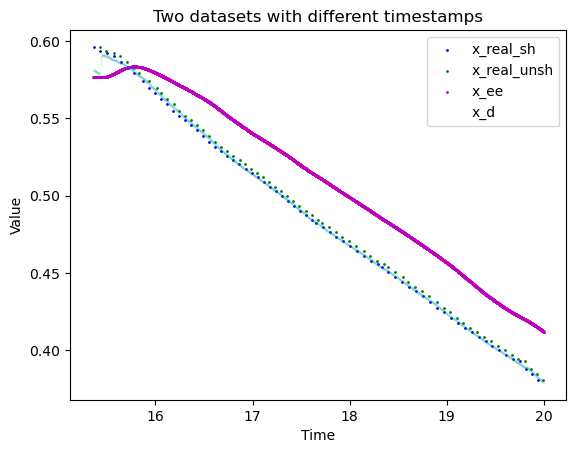

In [122]:
t_r = np.array(t_r)          
x_real_sh = np.array(x_real_sh)

t_s = np.array(t_s)          
x_real_unsh = np.array(x_real_unsh)

t_kf = np.array(t_kf)          
x_kf = np.array(x_kf)

t_ee = np.array(t_ee)          
x_ee = np.array(x_ee)

t_d = np.array(t_d)          
x_d = np.array(x_d)

t_min = 12 
t_max =20



mask_sh = t_r < t_max
t_r = t_r[mask_sh]
x_real_sh = x_real_sh[mask_sh]

mask_unsh = t_s < t_max
t_s = t_s[mask_unsh]
x_real_unsh = x_real_unsh[mask_unsh]

mask_kf = t_kf < t_max
t_kf = t_kf[mask_kf]
x_kf = x_kf[mask_kf]

mask_ee = t_ee < t_max
t_ee = t_ee[mask_ee]
x_ee = x_ee[mask_ee]

mask_d = t_d < t_max
t_d = t_d[mask_d]
x_d = x_d[mask_d]


fig, ax = plt.subplots()


ax.scatter(t_r, x_real_sh, color='b', label='x_real_sh', s=1)
ax.scatter(t_s, x_real_unsh, color='g', label='x_real_unsh', s=1)
#ax.scatter(t_kf, x_kf, color='r', label='x_kf', s=1)
ax.scatter(t_ee, x_ee, color='m', label='x_ee', s=1)
ax.scatter(t_d, x_d, color='c', label='x_d', s=1, alpha=0.02)

# Plot second dataset

ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Two datasets with different timestamps')
ax.legend()
plt.show()

In [121]:
x_sh = list()
y_sh = list()
z_sh = list()
t_real = list()
for i in open("/dev/shm/a_data.log").readlines():
    data = list(filter(lambda x: x != '', i.split(" ")))
    if (len(data) < 4):
        continue
    t_real.append(float(data[0]))

    x_sh.append(float(data[1]))
    y_sh.append(float(data[2]))
    z_sh.append(float(data[3][:-1]))

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for old dataset
times_1 = np.array(t)          # Notice time gaps (missing 5, 8, 9)
values_1 = np.array(x_r)
values_ee = np.array(x_a)


# Example data for new dataset
times_2 = np.array(t_real)  # Different timestamps
values_2 = np.array(x_sh)

t_max = 18
mask_1 = times_1 < t_max
times_1_filtered = times_1[mask_1]

values_1_filtered = values_1[mask_1]
values_ee_filtered  = values_ee[mask_1]


# Filter second dataset (only keep times < t_max)
mask_2 = times_2 < t_max
times_2_filtered = times_2[mask_2]
values_2_filtered = values_2[mask_2]





fig, ax = plt.subplots()

# Plot first dataset
ax.scatter(times_1_filtered, values_1_filtered, color='b', label='Dataset 1', s=1)
ax.scatter(times_1_filtered, values_ee_filtered, color='g', label='Dataset 1', s=1)

# Plot second dataset
ax.scatter(times_2_filtered, values_2_filtered, color='r', label='Dataset 2', s=1)

ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Two datasets with different timestamps')
ax.legend()
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 11500 but corresponding boolean dimension is 11032

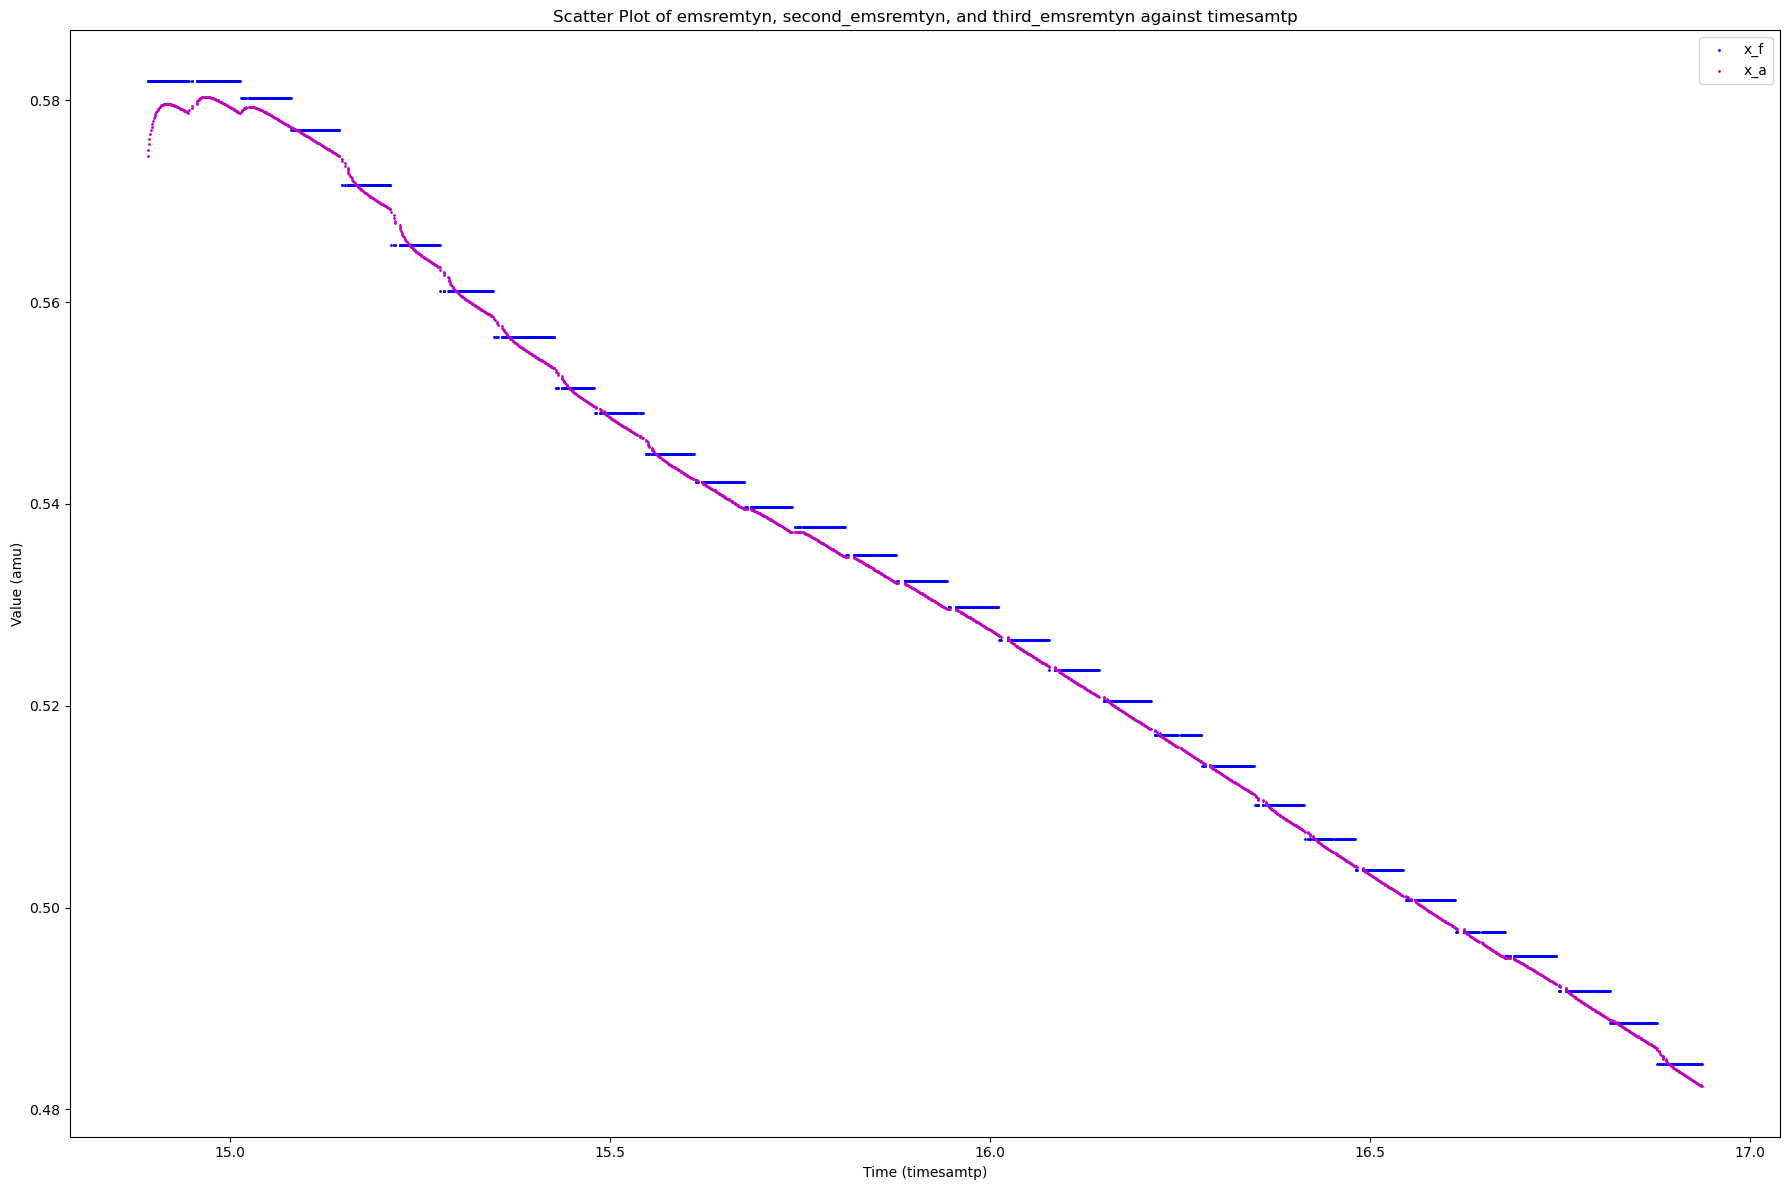

In [14]:
import matplotlib.pyplot as plt
import numpy as np

trim =70
trim_up = 2000#len(t)
timesamtp = np.array(t[trim:trim_up])
emsremtyn = np.array(x_m[trim:trim_up])
second_emsremtyn = np.array(x_f[trim:trim_up])
third_emsremtyn = np.array(x_r[trim:trim_up])
third_fourth = np.array(x_r[trim:trim_up])

fig, ax1 = plt.subplots(figsize=(18, 12))  # Set the size of the figure

# Scatter plot for the first dataset (emsremtyn)
#ax1.scatter(timesamtp, emsremtyn, color='g', label="x_m", s=1)  # Size set to 1

# Scatter plot for the second dataset (second_emsremtyn)
ax1.scatter(timesamtp, second_emsremtyn, color='b', label="x_f", s=1)  # Size set to 1
#ax1.scatter(timesamtp, third_emsremtyn, color='r', label="x_r", s=1)  # Size set to 1
ax1.scatter(timesamtp, third_fourth, color='m', label="x_a", s=1)  # Size set to 1

# Scatter plot for the third dataset (third_emsremtyn)

# Labels and title
ax1.set_xlabel('Time (timesamtp)')
ax1.set_ylabel('Value (amu)')  # Consistent unit "amu"
plt.title('Scatter Plot of emsremtyn, second_emsremtyn, and third_emsremtyn against timesamtp')

# Show the legend
ax1.legend()

fig.tight_layout()
plt.show()


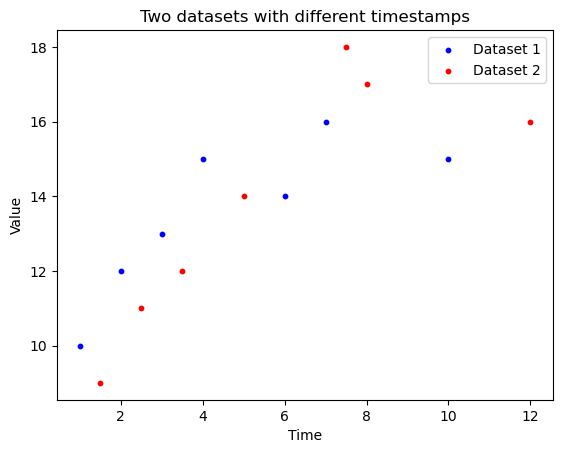

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for old dataset
times_1 = np.array([1, 2, 3, 4, 6, 7, 10])          # Notice time gaps (missing 5, 8, 9)
values_1 = np.array([10, 12, 13, 15, 14, 16, 15])

# Example data for new dataset
times_2 = np.array([1.5, 2.5, 3.5, 5, 7.5, 8, 12])  # Different timestamps
values_2 = np.array([9, 11, 12, 14, 18, 17, 16])

fig, ax = plt.subplots()

# Plot first dataset
ax.scatter(times_1, values_1, color='b', label='Dataset 1', s=10)

# Plot second dataset
ax.scatter(times_2, values_2, color='r', label='Dataset 2', s=10)

ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Two datasets with different timestamps')
ax.legend()
plt.show()

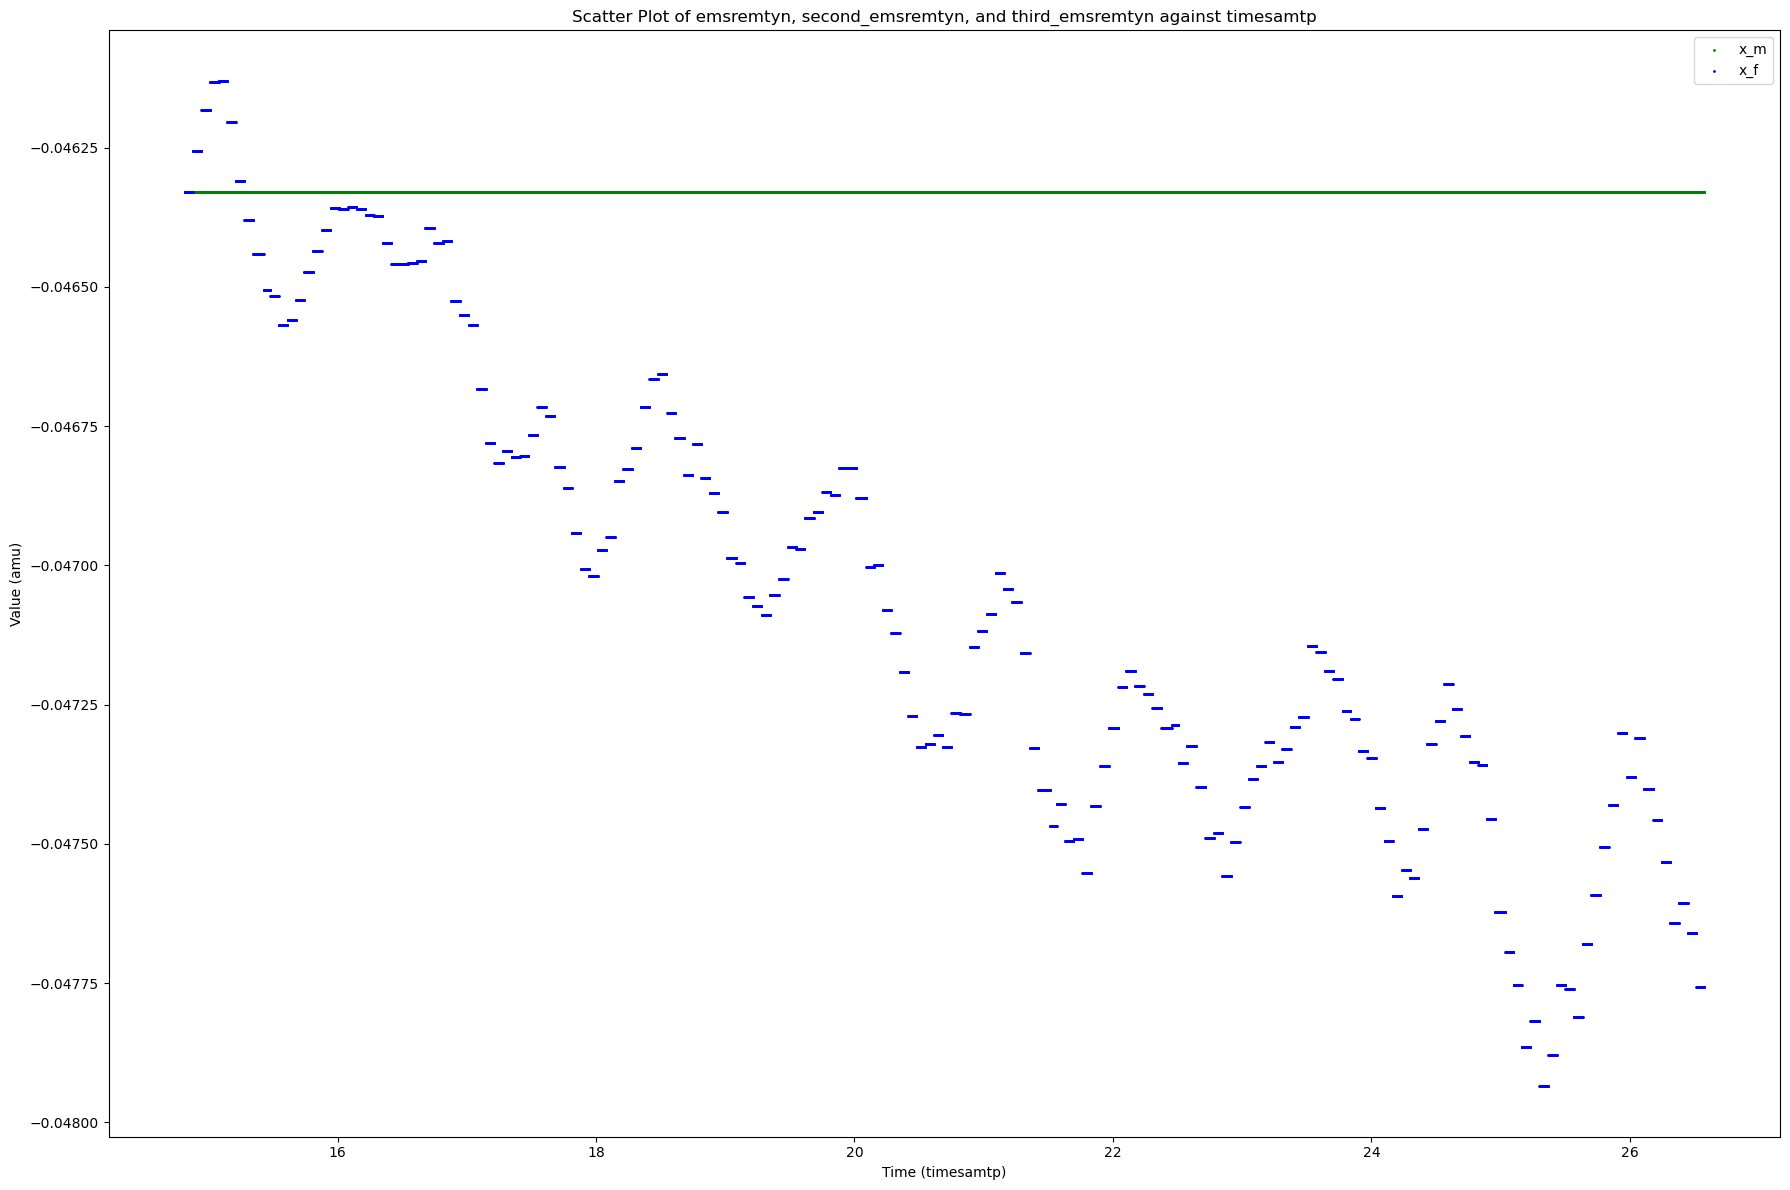

In [13]:
import matplotlib.pyplot as plt
import numpy as np

trim =0
trim_up = len(t)
timesamtp = np.array(t[trim:trim_up])
emsremtyn = np.array(vx_s[trim:trim_up])
second_emsremtyn = np.array(vx_k[trim:trim_up])

fig, ax1 = plt.subplots(figsize=(18, 12))  # Set the size of the figure

# Scatter plot for the first dataset (emsremtyn)
ax1.scatter(timesamtp, emsremtyn, color='g', label="x_m", s=1)  # Size set to 1

# Scatter plot for the second dataset (second_emsremtyn)
ax1.scatter(timesamtp, second_emsremtyn, color='b', label="x_f", s=1)  # Size set to 1

# Scatter plot for the third dataset (third_emsremtyn)

# Labels and title
ax1.set_xlabel('Time (timesamtp)')
ax1.set_ylabel('Value (amu)')  # Consistent unit "amu"
plt.title('Scatter Plot of emsremtyn, second_emsremtyn, and third_emsremtyn against timesamtp')

# Show the legend
ax1.legend()

fig.tight_layout()
plt.show()
